In [1]:
import pandas as pd

from pyramid.arima import auto_arima
df = pd.read_csv('train.csv')
df=df[df['store']==1]
df= df[df['item']==1]
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
df=df.drop(columns=['item', 'store'])
df=df.set_index('date')
train = df.loc['2016-01-01':'2016-12-01']
test = df.loc['2017-01-01':'2017-01-30']





C:\Users\magic\Anaconda3\envs\pmdarima\lib\site-packages\pyramid\__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)


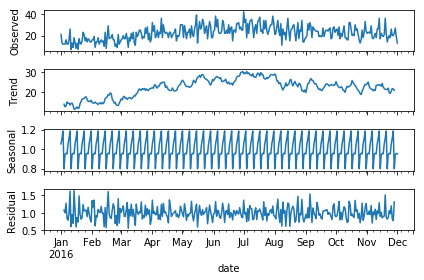

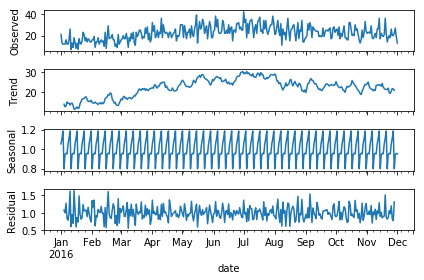

In [27]:

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train, model='multiplicative')

result.plot()


In [37]:

#model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model=auto_arima(train, start_p=1, start_q=1,
                           max_p=8, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.aic())
model.fit(train)






Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2058.810, BIC=2077.698, Fit time=4.633 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=2438.750, BIC=2446.305, Fit time=0.070 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=2288.252, BIC=2303.362, Fit time=1.216 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=2058.583, BIC=2073.694, Fit time=3.285 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=2057.206, BIC=2076.094, Fit time=5.654 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=2173.844, BIC=2188.955, Fit time=3.624 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=2060.698, BIC=2083.364, Fit time=23.194 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=2260.969, BIC=2272.302, Fit time=1.218 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=2058.120, BIC=2084.563, Fit time=19.491 seconds
Fit ARIMA: order=(1, 1, 1)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(2, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

,Prediction,sales
date,,
2017-01-01,21.993727,19
2017-01-02,20.634593,15
2017-01-03,19.135796,10
2017-01-04,20.225839,16
2017-01-05,19.826852,14
2017-01-06,17.791283,24
2017-01-07,20.637475,14
2017-01-08,18.833824,20
2017-01-09,19.973203,18


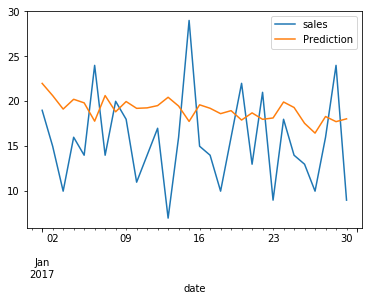

In [38]:
%matplotlib inline
import matplotlib
forecast = model.predict(n_periods=30)

forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])
pd.concat([test,forecast],axis=1).plot()
forecast['sales']=test.sales
forecast